
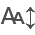

In [79]:
from v2realbot.tools.loadbatch import load_batch
from v2realbot.utils.utils import zoneNY
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import vectorbtpro as vbt
import os
from itables import init_notebook_mode, show

init_notebook_mode(all_interactive=True)

vbt.settings.set_theme("dark")
vbt.settings['plotting']['layout']['width'] = 1280
vbt.settings.plotting.auto_rangebreaks = True
# Set the option to display with pagination
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_rows', 10)  # Number of rows per page

# Alpaca API credentials
ALPACA_API_KEY = os.environ.get('ACCOUNT1_PAPER_API_KEY')
ALPACA_API_SECRET = os.environ.get('ACCOUNT1_PAPER_SECRET_KEY')

# Initialize Alpaca data client
alpaca_data = vbt.AlpacaData.set_custom_settings(client_config=dict(
        api_key=ALPACA_API_KEY,
        secret_key=ALPACA_API_SECRET
    )
)


# Fetch Data

In [80]:
# Define the symbol, start, and end dates for your data
symbol = 'BAC'
start_date = datetime.now() - timedelta(days=10)  # Last 30 days
end_date = datetime.now() - timedelta(days=1)  # yesterday
time_interval = '1T'  # 1-minute intervals '1 minute'

basic_data = vbt.AlpacaData.pull(["BAC"], start=start_date, end=end_date, timeframe=time_interval, tz="America/New_York")
basic_data = basic_data.transform(lambda x: x.between_time("9:30","16:00"))
#basic_data.data["BAC"].vbt.ohlcv.plot()


  0%|          | 0/1 [00:00<?, ?it/s]

# filter dates

In [81]:
#filter na dny
# dates_of_interest = pd.to_datetime(['2024-04-22', '2024-04-23']).tz_localize('US/Eastern')
# filtered_df = df.loc[df.index.normalize().isin(dates_of_interest)]

# df = filtered_df
# df.info()

basic_data.data["BAC"]

Open    High      Low   Close    Volume  \
Open time                                                               
2024-04-29 09:30:00-04:00  37.8400  37.940  37.7600  37.870  476819.0   
2024-04-29 09:31:00-04:00  37.8750  37.985  37.7800  37.815  147198.0   
2024-04-29 09:32:00-04:00  37.8050  37.850  37.7750  37.800  107729.0   
2024-04-29 09:33:00-04:00  37.7935  37.880  37.7935  37.860   52305.0   
2024-04-29 09:34:00-04:00  37.8600  37.890  37.8350  37.860   41294.0   
...                            ...     ...      ...     ...       ...   
2024-05-06 11:33:00-04:00  37.4800  37.485  37.4700  37.475   25795.0   
2024-05-06 11:34:00-04:00  37.4700  37.490  37.4700  37.485   25650.0   
2024-05-06 11:35:00-04:00  37.4900  37.525  37.4900  37.500   76940.0   
2024-05-06 11:36:00-04:00  37.5100  37.510  37.4950  37.505   29354.0   
2024-05-06 11:37:00-04:00  37.5000  37.511  37.4900  37.505   49202.0   

                           Trade count       VWAP  
Open time                                          
2024-04-29 09:30:00-04:00         2738  37.855352  
2024-04-29 09:31:00-04:00          975  37.904413  
2024-04-29 09:32:00-04:00          875  37.812062  
2024-04-29 09:33:00-04:00          517  37.842597  
2024-04-29 09:34:00-04:00          403  37.855641  
...                                ...        ...  
2024-05-06 11:33:00-04:00          192  37.475600  
2024-05-06 11:34:00-04:00          210  37.481738  
2024-05-06 11:35:00-04:00          433  37.506907  
2024-05-06 11:36:00-04:00          188  37.501721  
2024-05-06 11:37:00-04:00          293  37.505465  

[2083 rows x 7 columns]

In [82]:
m1_data = basic_data[['Open', 'High', 'Low', 'Close', 'Volume']]

m1_data.data["BAC"]
#m5_data = m1_data.resample("5T")

#m5_data.data["BAC"].head(10)

m15_data = m1_data.resample("15T")

m15_data = m15_data.transform(lambda x: x.between_time("9:30","15:59"))

m15 = m15_data.data["BAC"]

m15.vbt.ohlcv.plot()

m15

# m1_data.wrapper.index

# m1_resampler = m1_data.wrapper.get_resampler("1T")
# m1_resampler.index_difference(reverse=True)


# m5_resampler.prettify()

Open     High      Low    Close     Volume
Open time                                                               
2024-04-29 09:30:00-04:00  37.8400  37.9850  37.7349  37.8800  2098173.0
2024-04-29 09:45:00-04:00  37.8750  38.0300  37.8607  37.9850  1030038.0
2024-04-29 10:00:00-04:00  37.9900  38.0600  37.9600  38.0145   933777.0
2024-04-29 10:15:00-04:00  38.0100  38.0300  37.9500  37.9650   657084.0
2024-04-29 10:30:00-04:00  37.9650  37.9950  37.9250  37.9600   617961.0
...                            ...      ...      ...      ...        ...
2024-05-06 10:30:00-04:00  37.6253  37.6465  37.5650  37.5993   925904.0
2024-05-06 10:45:00-04:00  37.5994  37.6200  37.5400  37.5600   626772.0
2024-05-06 11:00:00-04:00  37.5600  37.5700  37.5100  37.5343   659209.0
2024-05-06 11:15:00-04:00  37.5300  37.5600  37.4650  37.4900   870303.0
2024-05-06 11:30:00-04:00  37.4950  37.5250  37.4700  37.5050   312117.0

[191 rows x 5 columns]

# Calculate VWAP

In [94]:
#WWAP
vbt.phelp(vbt.VWAP.run)
close = m1_data.close
high = m1_data.high
low = m1_data.low
volume = m1_data.volume
vwapD = vbt.VWAP.run(high, low, close, volume, anchor="D")
# vwapT = vbt.VWAP.run(high, low, close, volume, anchor="T")

#vwap.vwap

fig = m1_data.data["BAC"].vbt.ohlcv.plot()
vwapD.vwap.vbt.plot(fig=fig)
#vwapT.vwap.vbt.plot(fig=fig)
fig.show()

vwapD.vwap

#vwap = vbt.VWAP.run()

VWAP.run(
    high,
    low,
    close,
    volume,
    anchor=Default(value='D'),
    short_name='vwap',
    hide_params=None,
    hide_default=True,
    **kwargs
):
    Run `VWAP` indicator.
    
    * Inputs: `high`, `low`, `close`, `volume`
    * Parameters: `anchor`
    * Outputs: `vwap`
    
    Pass a list of parameter names as `hide_params` to hide their column levels, or True to hide all.
    Set `hide_default` to False to show the column levels of the parameters with a default value.
    
    Other keyword arguments are passed to `VWAP.run_pipeline`.


vwap_anchor                    array
symbol                           BAC
Open time                           
2024-04-29 09:30:00-04:00  37.856667
2024-04-29 09:31:00-04:00  37.857453
2024-04-29 09:32:00-04:00  37.850221
2024-04-29 09:33:00-04:00  37.849840
2024-04-29 09:34:00-04:00  37.850432
...                              ...
2024-05-06 11:33:00-04:00  37.572246
2024-05-06 11:34:00-04:00  37.571982
2024-05-06 11:35:00-04:00  37.571400
2024-05-06 11:36:00-04:00  37.571175
2024-05-06 11:37:00-04:00  37.570794

[2083 rows x 1 columns]

In [62]:
m1_data.data["BAC"]

Open     High      Low    Close     Volume
Open time                                                               
2024-04-29 09:30:00-04:00  37.8400  37.9850  37.7349  37.8800  2098173.0
2024-04-29 09:45:00-04:00  37.8750  38.0300  37.8607  37.9850  1030038.0
2024-04-29 10:00:00-04:00  37.9900  38.0600  37.9600  38.0145   933777.0
2024-04-29 10:15:00-04:00  38.0100  38.0300  37.9500  37.9650   657084.0
2024-04-29 10:30:00-04:00  37.9650  37.9950  37.9250  37.9600   617961.0
...                            ...      ...      ...      ...        ...
2024-05-06 09:45:00-04:00  37.5250  37.5700  37.4250  37.4900  1015426.0
2024-05-06 10:00:00-04:00  37.4950  37.6400  37.4700  37.6350  1420282.0
2024-05-06 10:15:00-04:00  37.6350  37.6900  37.5910  37.6250  1592625.0
2024-05-06 10:30:00-04:00  37.6253  37.6465  37.5650  37.5993   925904.0
2024-05-06 10:45:00-04:00  37.5994  37.6200  37.5400  37.5600   626772.0

[141 rows x 5 columns]

# defining ENTRY WINDOW and forced EXIT window

In [63]:
#m1_data.data["BAC"].info()
import datetime
# Define the market open and close times
market_open = datetime.time(9, 30)
market_close = datetime.time(16, 0)
entry_window_opens = 1
entry_window_closes = 350

forced_exit_start = 360
forced_exit_end = 390

forced_exit = m1_data.symbol_wrapper.fill(False)
entry_window_open=  m1_data.symbol_wrapper.fill(False)

# Calculate the time difference in minutes from market open for each timestamp
elapsed_min_from_open = (forced_exit.index.hour - market_open.hour) * 60 + (forced_exit.index.minute - market_open.minute)

entry_window_open[(elapsed_min_from_open >= entry_window_opens) & (elapsed_min_from_open < entry_window_closes)] = True
forced_exit[(elapsed_min_from_open >= forced_exit_start) & (elapsed_min_from_open < forced_exit_end)] = True

#entry_window_open.info()
# forced_exit.tail(100)

In [64]:
close = m1_data.close

rsi = vbt.RSI.run(close, window=14)

long_entries = (rsi.rsi.vbt.crossed_below(28) & entry_window_open)
long_exits = (rsi.rsi.vbt.crossed_above(70) | forced_exit)
#long_entries.info()
#number of trues and falses in long_entries
#long_entries.value_counts()
long_exits.value_counts()

(14, BAC)
False        127
True          14
Name: count, dtype: int64

In [65]:
close

symbol                         BAC
Open time                         
2024-04-29 09:30:00-04:00  37.8800
2024-04-29 09:45:00-04:00  37.9850
2024-04-29 10:00:00-04:00  38.0145
2024-04-29 10:15:00-04:00  37.9650
2024-04-29 10:30:00-04:00  37.9600
...                            ...
2024-05-06 09:45:00-04:00  37.4900
2024-05-06 10:00:00-04:00  37.6350
2024-05-06 10:15:00-04:00  37.6250
2024-05-06 10:30:00-04:00  37.5993
2024-05-06 10:45:00-04:00  37.5600

[141 rows x 1 columns]

In [66]:
def plot_rsi(rsi, close, entries, exits):
    fig = vbt.make_subplots(rows=1, cols=1, shared_xaxes=True, specs=[[{"secondary_y": True}]], vertical_spacing=0.02, subplot_titles=("RSI", "Price" ))
    close.vbt.plot(fig=fig, add_trace_kwargs=dict(secondary_y=True))
    rsi.plot(fig=fig, add_trace_kwargs=dict(secondary_y=False))
    entries.vbt.signals.plot_as_entries(close, fig=fig, add_trace_kwargs=dict(secondary_y=True))  
    exits.vbt.signals.plot_as_exits(close, fig=fig, add_trace_kwargs=dict(secondary_y=True))  
    return fig

plot_rsi(rsi, close, long_entries, long_exits)


FigureWidget({
    'data': [{'name': 'BAC',
              'showlegend': True,
              'type': 'scatter',
              'uid': '8eef4694-305a-4f38-9916-7a6176babe2e',
              'x': array([datetime.datetime(2024, 4, 29, 9, 30, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 29, 9, 45, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 29, 10, 0, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 29, 10, 15, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 29, 10, 30, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 29, 10, 45, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 29, 

In [56]:
rsi.rsi

rsi_window                 14
symbol                    BAC
Open time                    
2024-04-29 09:30:00-04:00 NaN
2024-04-29 09:45:00-04:00 NaN
2024-04-29 10:00:00-04:00 NaN
2024-04-29 10:15:00-04:00 NaN
2024-04-29 10:30:00-04:00 NaN
...                        ..
2024-05-05 15:45:00-04:00 NaN
2024-05-06 09:30:00-04:00 NaN
2024-05-06 09:45:00-04:00 NaN
2024-05-06 10:00:00-04:00 NaN
2024-05-06 10:15:00-04:00 NaN

[186 rows x 1 columns]

In [166]:
vbt.phelp(vbt.Portfolio.from_signals)

Portfolio.from_signals(
    close,
    entries=None,
    exits=None,
    *,
    direction=None,
    long_entries=None,
    long_exits=None,
    short_entries=None,
    short_exits=None,
    adjust_func_nb=None,
    adjust_args=(),
    signal_func_nb=None,
    signal_args=(),
    post_segment_func_nb=None,
    post_segment_args=(),
    order_mode=False,
    size=None,
    size_type=None,
    price=None,
    fees=None,
    fixed_fees=None,
    slippage=None,
    min_size=None,
    max_size=None,
    size_granularity=None,
    leverage=None,
    leverage_mode=None,
    reject_prob=None,
    price_area_vio_mode=None,
    allow_partial=None,
    raise_reject=None,
    log=None,
    val_price=None,
    accumulate=None,
    upon_long_conflict=None,
    upon_short_conflict=None,
    upon_dir_conflict=None,
    upon_opposite_entry=None,
    order_type=None,
    limit_delta=None,
    limit_tif=None,
    limit_expiry=None,
    limit_reverse=None,
    upon_adj_limit_conflict=None,
    upon_opp_lim

In [67]:
sl_stop = np.arange(0.03/100, 0.4/100, 0.05/100).tolist()
# Using the round function
sl_stop = [round(val, 4) for val in sl_stop]
print(sl_stop)
sl_stop = vbt.Param(sl_stop) #np.nan mean s no stoploss

pf = vbt.Portfolio.from_signals(close=close, entries=long_entries, exits=long_exits, sl_stop=sl_stop, tp_stop = sl_stop, fees=0.0167/100, freq="1s") #sl_stop=sl_stop, tp_stop = sl_stop,

pf.stats()

[0.0003, 0.0008, 0.0013, 0.0018, 0.0023, 0.0028, 0.0033, 0.0038]


/var/folders/8p/dwqnp65s0s77jdbm4_6z4vp80000gn/T/ipykernel_15645/1972107742.py:9: UserWarning:

Object has multiple columns. Aggregated some metrics using <function mean at 0x10a0d43a0>. Pass column to select a single column/group.



Start            2024-04-29 09:30:00-04:00
End              2024-05-06 10:45:00-04:00
Period                     0 days 00:02:21
Start Value                          100.0
Min Value                        99.927477
                           ...            
Expectancy                       -0.072523
Sharpe Ratio                   -589.996672
Calmar Ratio                    -50.816428
Omega Ratio                            0.0
Sortino Ratio                  -588.835078
Name: agg_stats, Length: 29, dtype: object

In [30]:
pf[(0.0003,0.0018)].plot()

FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#1f77b4'},
              'mode': 'lines',
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'c9aba84d-aeb8-47df-b5b7-f8041c89e415',
              'x': array([datetime.datetime(2024, 4, 29, 9, 30, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 29, 9, 31, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 29, 9, 32, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          ...,
                          datetime.datetime(2024, 5, 6, 10, 2, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 5, 6, 10, 3, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024

In [115]:
pf[0.03].plot_trade_signals()


FigureWidget({
    'data': [{'line': {'color': '#1f77b4'},
              'mode': 'lines',
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '4a416164-b099-434c-ac01-f0b90240ffd6',
              'x': array([datetime.datetime(2024, 4, 22, 9, 30, 1, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 22, 9, 30, 2, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 22, 9, 30, 3, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
                          ...,
                          datetime.datetime(2024, 4, 29, 15, 59, 57, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 29, 15, 59, 58, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 29, 15, 59, 59, tzinfo=<DstTzInfo 'US/

# pristup k pf jako multi index

In [149]:
#pf[0.03].plot()
#pf.order_records
pf[(0.03)].stats()

/var/folders/8p/dwqnp65s0s77jdbm4_6z4vp80000gn/T/ipykernel_13317/946856841.py:3: UserWarning:

Object has multiple columns. Aggregated some metrics using <function mean at 0x113e32830>. Pass column to select a single column/group.



Start            2024-04-22 09:30:01-04:00
End              2024-04-29 15:59:59-04:00
Period                    51 days 07:53:00
Start Value                          100.0
Min Value                        99.929678
                           ...            
Expectancy                        0.236952
Sharpe Ratio                      1.091921
Calmar Ratio                     37.489139
Omega Ratio                       1.005129
Sortino Ratio                     1.549924
Name: agg_stats, Length: 29, dtype: object

In [68]:
#zgrupovane statistiky
stats_df = pf.stats([
    'total_return',
    'total_trades',
    'win_rate',
    'expectancy'
], agg_func=None)
stats_df


stats_df.nlargest(10, 'Total Return [%]')
#stats_df.info()

Total Return [%]  Total Trades  \
sl_stop tp_stop rsi_window symbol                                   
0.0003  0.0003  14         BAC            -0.063384             1   
        0.0008  14         BAC            -0.063384             1   
        0.0013  14         BAC            -0.063384             1   
        0.0018  14         BAC            -0.063384             1   
        0.0023  14         BAC            -0.063384             1   
        0.0028  14         BAC            -0.063384             1   
        0.0033  14         BAC            -0.063384             1   
        0.0038  14         BAC            -0.063384             1   
0.0008  0.0003  14         BAC            -0.073829             1   
        0.0008  14         BAC            -0.073829             1   

                                   Win Rate [%]  Expectancy  
sl_stop tp_stop rsi_window symbol                            
0.0003  0.0003  14         BAC              0.0   -0.063384  
        0.0008  14         BAC              0.0   -0.063384  
        0.0013  14         BAC              0.0   -0.063384  
        0.0018  14         BAC              0.0   -0.063384  
        0.0023  14         BAC              0.0   -0.063384  
        0.0028  14         BAC              0.0   -0.063384  
        0.0033  14         BAC              0.0   -0.063384  
        0.0038  14         BAC              0.0   -0.063384  
0.0008  0.0003  14         BAC              0.0   -0.073829  
        0.0008  14         BAC              0.0   -0.073829

In [175]:
pf[(0.0011,0.0013000000000000002)].plot()

FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#1f77b4'},
              'mode': 'lines',
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '91d1b8b6-43f1-43e4-877f-2776bbf0d549',
              'x': array([datetime.datetime(2024, 4, 22, 9, 30, 1, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 22, 9, 30, 2, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 22, 9, 30, 3, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
                          ...,
                          datetime.datetime(2024, 4, 29, 15, 59, 57, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 29, 15, 59, 58, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2024, 4, 29, 

In [ ]:
from pandas.tseries.offsets import DateOffset

temp_data = basic_data['2024-4-22']
temp_data
res1m = temp_data[["Open", "High", "Low", "Close", "Volume"]]

# Define a custom date offset that starts at 9:30 AM and spans 4 hours
custom_offset = DateOffset(hours=4, minutes=30)

# res1m = res1m.get().resample("4H").agg({  
#     "Open": "first",
#     "High": "max",
#     "Low": "min",
#     "Close": "last",
#     "Volume": "sum"
# })

res4h = res1m.resample("1h", resample_kwargs=dict(origin="start"))

res4h.data

res15m = res1m.resample("15T", resample_kwargs=dict(origin="start"))

res15m.data["BAC"]

In [ ]:
@vbt.njit
def long_entry_place_func_nb(c, low, close, time_in_ns, rsi14, window_open, window_close):
    market_open_minutes = 570  # 9 hours * 60 minutes + 30 minutes

    for out_i in range(len(c.out)):
        i = c.from_i + out_i

        current_minutes = vbt.dt_nb.hour_nb(time_in_ns[i]) * 60 + vbt.dt_nb.minute_nb(time_in_ns[i])
        #print("current_minutes", current_minutes)
        # Calculate elapsed minutes since market open at 9:30 AM
        elapsed_from_open = current_minutes - market_open_minutes
        elapsed_from_open = elapsed_from_open if elapsed_from_open >= 0 else 0
        #print( "elapsed_from_open", elapsed_from_open)

        #elapsed_from_open = elapsed_minutes_from_open_nb(time_in_ns) 
        in_window = elapsed_from_open > window_open and elapsed_from_open < window_close
        #print("in_window", in_window)
        # if in_window:
        #     print("in window")

        if in_window and rsi14[i] > 60: # and low[i, c.col] <= hit_price: # and hour == 9:  # (4)!
            return out_i
    return -1

@vbt.njit
def long_exit_place_func_nb(c, high, close, time_index, tp, sl):  # (5)!
    entry_i = c.from_i - c.wait
    entry_price = close[entry_i, c.col]
    hit_price = entry_price * (1 + tp)
    stop_price = entry_price * (1 - sl)
    for out_i in range(len(c.out)):
        i = c.from_i + out_i
        last_bar_of_day = vbt.dt_nb.day_changed_nb(time_index[i], time_index[i + 1])

        #print(next_day)
        if last_bar_of_day: #pokud je dalsi next day, tak zavirame posledni
            print("ted",out_i)
            return out_i
        if close[i, c.col] >= hit_price or close[i, c.col] <= stop_price :
            return out_i
    return -1




In [ ]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))

df

In [ ]:
df.sum()